In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv("/content/CAR DETAILS FROM CAR DEKHO.csv")

In [ ]:
data.shape

(4340, 8)

In [ ]:
data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [ ]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
data.isnull()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4335,False,False,False,False,False,False,False,False
4336,False,False,False,False,False,False,False,False
4337,False,False,False,False,False,False,False,False
4338,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [ ]:
data.duplicated().sum()

np.int64(763)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(3577, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3577 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3577 non-null   object
 1   year           3577 non-null   int64 
 2   selling_price  3577 non-null   int64 
 3   km_driven      3577 non-null   int64 
 4   fuel           3577 non-null   object
 5   seller_type    3577 non-null   object
 6   transmission   3577 non-null   object
 7   owner          3577 non-null   object
dtypes: int64(3), object(5)
memory usage: 251.5+ KB


In [ ]:
data.dtypes

,0
name,object
year,int64
selling_price,int64
km_driven,int64
fuel,object
seller_type,object
transmission,object
owner,object


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='name', ylabel='Count'>

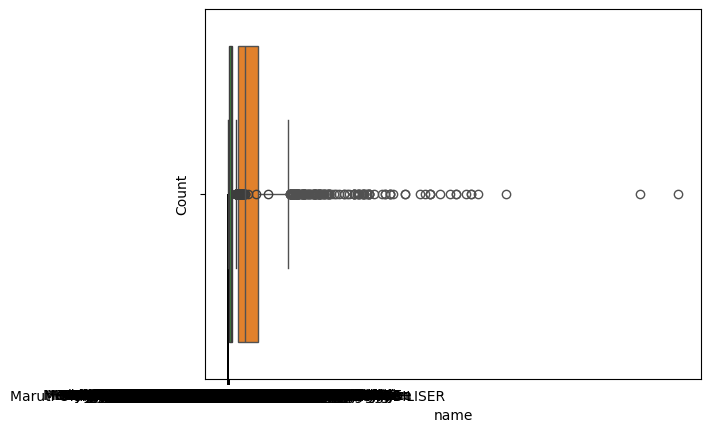

In [ ]:
sns.histplot(data['name'],kde=True)
sns.boxplot(x=data['selling_price'])
sns.boxplot(x=data['km_driven'])

<Axes: xlabel='seller_type', ylabel='count'>

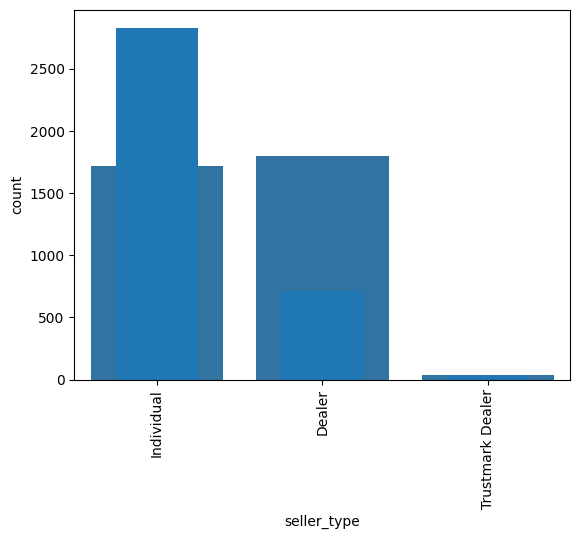

In [ ]:
sns.countplot(x='fuel', data=data)
data['seller_type'].value_counts().plot(kind='bar')


<Axes: xlabel='fuel', ylabel='selling_price'>

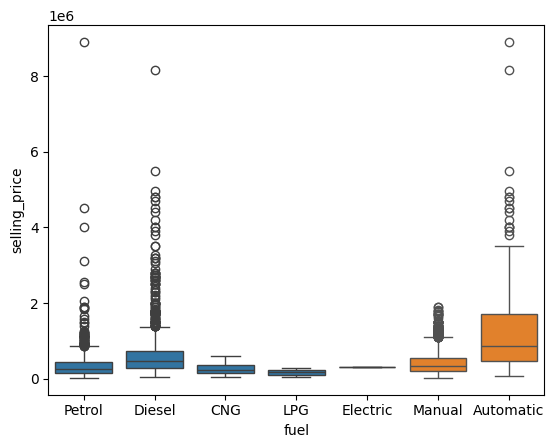

In [ ]:
#Bivariate Analysis
#categorical vs target
sns.boxplot(x='fuel', y='selling_price', data=data)
sns.boxplot(x='transmission', y='selling_price', data=data)

<Axes: xlabel='km_driven', ylabel='selling_price'>

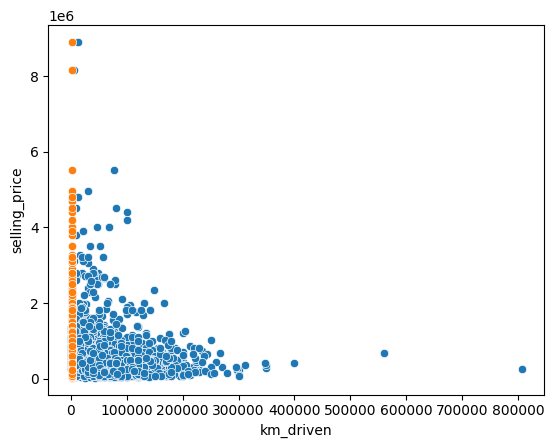

In [ ]:
#Numerical vs Target
sns.scatterplot(x='km_driven', y='selling_price', data=data)
sns.scatterplot(x='year', y='selling_price', data=data)

In [ ]:
brand_name=data['name'].to_list()
for i in range(len(brand_name)):
  car=brand_name[i].split(' ')
  brand_name[i]=car[0];

data['name']=brand_name

In [ ]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
#Make the price last Column
selling_price=data['selling_price']
data.drop(columns='selling_price',axis=1,inplace=True)
data['selling_price']=selling_price

In [ ]:
data.head(2)

,name,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,Maruti,2007,70000,Petrol,Individual,Manual,First Owner,60000
1,Maruti,2007,50000,Petrol,Individual,Manual,First Owner,135000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3577 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3577 non-null   object
 1   year           3577 non-null   int64 
 2   km_driven      3577 non-null   int64 
 3   fuel           3577 non-null   object
 4   seller_type    3577 non-null   object
 5   transmission   3577 non-null   object
 6   owner          3577 non-null   object
 7   selling_price  3577 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 251.5+ KB


In [ ]:
#Encode Object DataType
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoded_columns=['name','fuel','seller_type','transmission','owner']
for i in encoded_columns:
      data[i]=encoder.fit_transform(data[i])

In [ ]:
data.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,18,2007,70000,4,1,1,0,60000
1,18,2007,50000,4,1,1,0,135000
2,10,2012,100000,1,1,1,0,600000
3,5,2017,46000,4,1,1,0,250000
4,9,2014,141000,1,1,1,2,450000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3577 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   name           3577 non-null   int64
 1   year           3577 non-null   int64
 2   km_driven      3577 non-null   int64
 3   fuel           3577 non-null   int64
 4   seller_type    3577 non-null   int64
 5   transmission   3577 non-null   int64
 6   owner          3577 non-null   int64
 7   selling_price  3577 non-null   int64
dtypes: int64(8)
memory usage: 251.5 KB


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=data.drop(columns='selling_price',axis=1)
Y=data['selling_price']

In [ ]:
X

,name,year,km_driven,fuel,seller_type,transmission,owner
0,18,2007,70000,4,1,1,0
1,18,2007,50000,4,1,1,0
2,10,2012,100000,1,1,1,0
3,5,2017,46000,4,1,1,0
4,9,2014,141000,1,1,1,2
...,...,...,...,...,...,...,...
4335,10,2014,80000,1,1,1,2
4336,10,2014,80000,1,1,1,2
4337,18,2009,83000,4,1,1,2
4338,10,2016,90000,1,1,1,0


In [ ]:
y

,selling_price
0,60000
1,135000
2,600000
3,250000
4,450000
...,...
4335,409999
4336,409999
4337,110000
4338,865000


In [ ]:
print(X.shape)
print(Y.shape)

(3577, 7)
(3577,)


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X_test.shape)
print(y_test.shape)


(716, 7)
(716,)


In [ ]:
print(X_train.shape)
print(y_train.shape)

(2861, 7)
(2861,)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
lr.coef_

array([-3.22864109e+03,  3.40787734e+04, -8.84224311e-01, -8.44691623e+04,
       -4.44228183e+04, -7.80177156e+05, -1.64466408e+04])

In [ ]:
lr.intercept_

np.float64(-67043021.87361775)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
y_pred

array([1216688.29668625,   96312.93853414, -468149.86078245,
        212954.27277783, 1211332.2935711 ,  855392.00023574,
        818550.34758225,  563893.26156168,  480815.49271025,
        405365.48797216,  317685.09623982,  510784.15824275,
         12458.70509281,  666293.49791849, 1581379.17808992,
        599589.77315512,  236002.54862031,  324753.94587184,
        623801.16369474, 1446560.414335  ,  618860.73004815,
        317829.87607174,  299439.73537342,  680822.47332422,
        204755.45921212,  767117.77694249,  234023.23343204,
       -132698.63169665,  324878.9864383 ,  437408.10076809,
        220260.07011166,  105748.07497221,  328260.99074803,
        -13963.31695098,  307194.50022504,  600766.01216035,
        475907.99574211,  153777.87722056,  983245.25478488,
        157349.39502181, -106869.50298429,  433810.11798523,
        426897.49244571,  470338.83245094,  551661.73047759,
        415113.82044737,  565176.17689976,  719015.69977376,
         87310.34347226,

In [ ]:
mse=mean_squared_error(y_test,y_pred)
print(mse)

188179067995.3109


In [ ]:
r2score=r2_score(y_test,y_pred)

In [ ]:
print(r2score)

0.38380618902515884


In [ ]:
mae=mean_absolute_error(y_test,y_pred)
print(mae)

215315.38538331314


In [ ]:
mean_price = data['selling_price'].mean()

custom_accuracy = 100 - (mae / mean_price) * 100
print(f"Custom Regression Accuracy: {custom_accuracy:.2f}%")


Custom Regression Accuracy: 54.57%


In [ ]:
from sklearn.linear_model import Ridge,Lasso
R=Ridge(alpha=1.0)
L=Lasso(alpha=1.0)

In [ ]:
R.fit(X_train,y_train)


Ridge()

In [ ]:
L.fit(X_train,y_train)

Lasso()

In [ ]:
ypred_L=L.predict(X_test)

In [ ]:
ypred_R=R.predict(X_test)

In [ ]:
mse1=mean_squared_error(y_test,ypred_L)
print(mse1)

188179014051.7381


In [ ]:
mae_R=mean_absolute_error(y_test,ypred_R)
print(mae_R)

215215.26428481087


In [ ]:
mae_L=mean_absolute_error(y_test,ypred_L)
print(mae_L)

215314.81719434544


In [ ]:
mean_price = data['selling_price'].mean()

custom_accuracy = 100 - (mae_R / mean_price) * 100
print(f"Custom Regression Accuracy: {custom_accuracy:.2f}%")

Custom Regression Accuracy: 54.59%


In [ ]:
mean_price = data['selling_price'].mean()

custom_accuracy = 100 - (mae_L / mean_price) * 100
print(f"Custom Regression Accuracy: {custom_accuracy:.2f}%")

Custom Regression Accuracy: 54.57%


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
Rfr=RandomForestRegressor(n_estimators=100,max_depth=10)

In [ ]:
Rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=10)

In [ ]:
y_pred11=Rfr.predict(X_test)
mse11=mean_squared_error(y_test,y_pred)
rmse11 = np.sqrt(mse)
mae11=mean_absolute_error(y_test,y_pred)
r211=r2_score(y_test,y_pred)
print('Model Performance Metrics:')
print("Mean_squared_error :",mse11)
print("Root mean_squared_error :",rmse11)
print("Mean_absolute_error :",mae11)
print("R2_score :",r211)

Model Performance Metrics:
Mean_squared_error : 188179067995.3109
Root mean_squared_error : 433796.1133935053
Mean_absolute_error : 215315.38538331314
R2_score : 0.38380618902515884


In [ ]:
mean_price = data['selling_price'].mean()

custom_accuracy = 100 - (mae11 / mean_price) * 100
print(f"Custom Regression Accuracy: {custom_accuracy:.2f}%")

Custom Regression Accuracy: 54.57%


In [ ]:
mean_price = data['selling_price'].mean()

custom_accuracy = 100 - (r211 / mean_price) * 100
print(f"Custom Regression Accuracy: {custom_accuracy:.2f}%")

Custom Regression Accuracy: 100.00%


<ipython-input-269-2941243153>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance,palette="viridis")


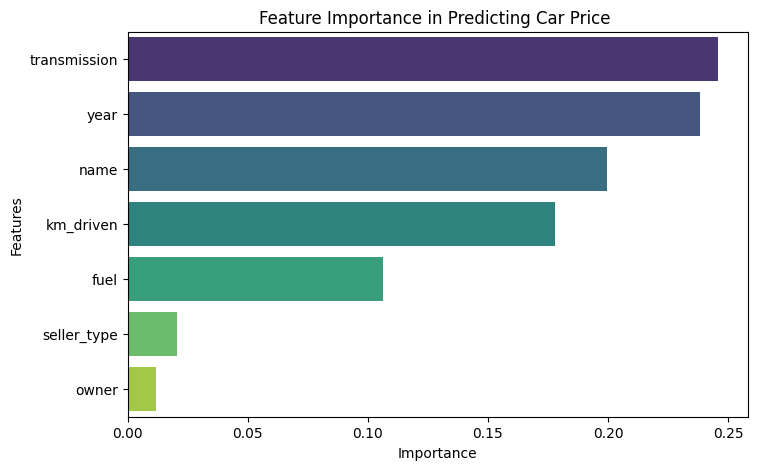

In [ ]:
# Feature Importance Visualization
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': Rfr.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='importance', y='feature', data=feature_importance,palette="viridis")
plt.title('Feature Importance in Predicting Car Price ')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [ ]:
import pickle

label_encoder_name=LabelEncoder()
label_encoder_name.fit(data['name'])

label_encoder_fuel = LabelEncoder()
label_encoder_fuel.fit(data['fuel'])

label_encoder_seller = LabelEncoder()
label_encoder_seller.fit(data['seller_type'])

label_encoder_trans = LabelEncoder()
label_encoder_trans.fit(data['transmission'])

label_encoder_owner = LabelEncoder()
label_encoder_owner.fit(data['owner'])

pickle.dump(Rfr, open('car_price__model.sav', 'wb'))
pickle.dump(label_encoder_name, open('label_encoder_name.sav', 'wb'))
pickle.dump(label_encoder_fuel, open('label_encoder_fuel.sav', 'wb'))
pickle.dump(label_encoder_seller, open('label_encoder_seller.sav', 'wb'))
pickle.dump(label_encoder_trans, open('label_encoder_trans.sav', 'wb'))
pickle.dump(label_encoder_owner,open('label_encoder_owner.sav','wb'))

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 96.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.1 MB/s eta 0:00:00
